In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense, Dropout
import os
from PIL import Image

2024-06-01 22:38:04.133591: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 22:38:04.133696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 22:38:04.318083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
batch_size=32
image_size=256
channels=3
epochs=10

In [4]:
test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/bird-species-classification-220-categories/Test',
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size,
    
)
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/bird-species-classification-220-categories/Train',
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size,
    
)


Found 2374 files belonging to 200 classes.
Found 9414 files belonging to 200 classes.


In [5]:

class_names=test_ds.class_names

In [6]:
train=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [7]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
base_model.trainable = False

In [9]:

model=models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(200,activation="softmax")
])


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [12]:
model.fit(
    train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
  2/295 ━━━━━━━━━━━━━━━━━━━━ 26s 89ms/step - accuracy: 0.0000e+00 - loss: 6.1800   

I0000 00:00:1717281538.152821     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717281538.202250     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 33/295 ━━━━━━━━━━━━━━━━━━━━ 1:03 243ms/step - accuracy: 0.0183 - loss: 6.1587

W0000 00:00:1717281545.861691     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


295/295 ━━━━━━━━━━━━━━━━━━━━ 67s 103ms/step - accuracy: 0.1320 - loss: 4.5603
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 26s 89ms/step - accuracy: 0.5818 - loss: 1.6868
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 27s 93ms/step - accuracy: 0.7616 - loss: 1.0246
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.8681 - loss: 0.6700
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - accuracy: 0.9253 - loss: 0.4522
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.9530 - loss: 0.3299
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.9788 - loss: 0.2424
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.9893 - loss: 0.1752
Epoch 9/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.9951 - loss: 0.1326
Epoch 10/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.9966 - loss: 0.1060


In [13]:
predict=model.predict(test)

 2/75 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step 

W0000 00:00:1717281844.183579     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/75 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step 

W0000 00:00:1717281850.326375     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step


In [15]:
model.save("Birds.keras")

actual label: Yellow_billed_Cuckoo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Mangrove_Cuckoo


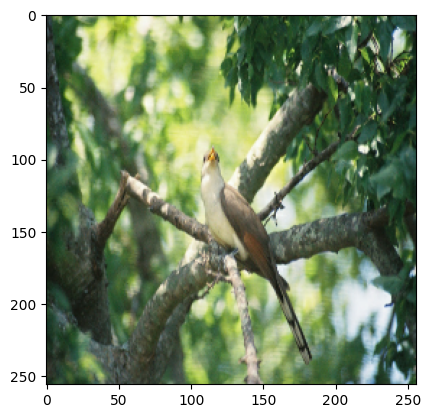

In [40]:
import matplotlib.pyplot as plt
import numpy as np
for image,label in test.take(1):
    firstimage=image[0].numpy().astype('uint8')
    firstlabel=label[0].numpy()
    plt.imshow(firstimage)
    print("actual label:",class_names[firstlabel])
    prediction=model.predict(image)
    print(class_names[np.argmax(prediction[0])])